In [29]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()


2024-10-11 12:17:37.655740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /device:GPU:0 with 45806 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:15:00.0, compute capability: 7.5


'/device:GPU:0'

2024-10-11 12:17:37.656007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /device:GPU:1 with 47365 MB memory:  -> device: 1, name: Quadro RTX 8000, pci bus id: 0000:2d:00.0, compute capability: 7.5


In [30]:
# Declare datase.t path
dataset_folder_training='./fer+ck/Training'
dataset_folder_test='./fer+ck/PrivateTest'
sub_folders_training=os.listdir(dataset_folder_training)
sub_folders_test=os.listdir(dataset_folder_test)

# del sub_folders_training[-2:]

# sub_folders_training.remove('fear')
sub_folders_training

# del sub_folders_test[-2:]

# sub_folders_test.remove('fear')
# sub_folders_test

['happiness',
 'neutral',
 'fear',
 'surprise',
 'sadness',
 'anger',
 'disgust',
 'contempt']

In [31]:
# Read folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]

temp = sub_folders_training

# Read folders in the main dataset folder, one at a time
for sub_folder in sub_folders_training:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index
  path = dataset_folder_training+'/'+sub_folder
  sub_folder_images= os.listdir(path)

# Read images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(label))
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    image= cv2.resize(image,(224,224))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)
  

./fer+ck/Training/happiness/fer0027751.png	0
./fer+ck/Training/happiness/fer0014872.png	0
./fer+ck/Training/happiness/fer0022190.png	0
./fer+ck/Training/happiness/fer0022984.png	0
./fer+ck/Training/happiness/fer0018428.png	0
./fer+ck/Training/happiness/fer0020890.png	0
./fer+ck/Training/happiness/fer0000144.png	0
./fer+ck/Training/happiness/fer0008224.png	0
./fer+ck/Training/happiness/fer0005955.png	0
./fer+ck/Training/happiness/fer0017258.png	0
./fer+ck/Training/happiness/fer0004621.png	0
./fer+ck/Training/happiness/fer0002331.png	0
./fer+ck/Training/happiness/fer0014396.png	0
./fer+ck/Training/happiness/fer0022885.png	0
./fer+ck/Training/happiness/fer0018733.png	0
./fer+ck/Training/happiness/fer0008395.png	0
./fer+ck/Training/happiness/fer0020252.png	0
./fer+ck/Training/happiness/fer0023515.png	0
./fer+ck/Training/happiness/fer0014164.png	0
./fer+ck/Training/happiness/fer0005873.png	0
./fer+ck/Training/happiness/fer0024920.png	0
./fer+ck/Training/happiness/fer0020257.png	0
./fer+ck/T

In [32]:
# Read folder names as labels and images underneath
i=0
last_test=[]
images_test=[]
labels_test=[]

temp = sub_folders_test

# Read folders in the main dataset folder, one at a time
for sub_folder in sub_folders_training:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index
  path = dataset_folder_test+'/'+sub_folder
  sub_folder_images= os.listdir(path)

# Read images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(label))
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    image= cv2.resize(image,(224,224))
    images_test.append(image)
    labels_test.append(label)
    i+=1
  last_test.append(i)

./fer+ck/PrivateTest/happiness/fer0034129.png	0
./fer+ck/PrivateTest/happiness/fer0033428.png	0
./fer+ck/PrivateTest/happiness/fer0032570.png	0
./fer+ck/PrivateTest/happiness/fer0033108.png	0
./fer+ck/PrivateTest/happiness/fer0032465.png	0
./fer+ck/PrivateTest/happiness/fer0032390.png	0
./fer+ck/PrivateTest/happiness/fer0035515.png	0
./fer+ck/PrivateTest/happiness/fer0035780.png	0
./fer+ck/PrivateTest/happiness/fer0032722.png	0
./fer+ck/PrivateTest/happiness/fer0033926.png	0
./fer+ck/PrivateTest/happiness/fer0035157.png	0
./fer+ck/PrivateTest/happiness/fer0032351.png	0
./fer+ck/PrivateTest/happiness/fer0034126.png	0
./fer+ck/PrivateTest/happiness/fer0035131.png	0
./fer+ck/PrivateTest/happiness/fer0035416.png	0
./fer+ck/PrivateTest/happiness/fer0033118.png	0
./fer+ck/PrivateTest/happiness/fer0032449.png	0
./fer+ck/PrivateTest/happiness/fer0034651.png	0
./fer+ck/PrivateTest/happiness/fer0034388.png	0
./fer+ck/PrivateTest/happiness/fer0035361.png	0
./fer+ck/PrivateTest/happiness/fer003382

In [33]:
# Declare x and y  
images_x = np.array(images)
labels_y = np.array(labels)

images_x_test = np.array(images_test)
labels_y_test = np.array(labels_test)

# encoding the labels
num_of_classes = len(sub_folders_training)
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)
labels_y_test_encoded = tf.keras.utils.to_categorical(labels_y_test,num_classes=num_of_classes)

images_x_test.shape

(3546, 224, 224, 3)

In [34]:
X_train = images_x
Y_train = labels_y_encoded

X_test = images_x_test
Y_test = labels_y_test_encoded

# Reshape the images to prepare them for normalization
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Reshape the normalized data back to the original shape
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

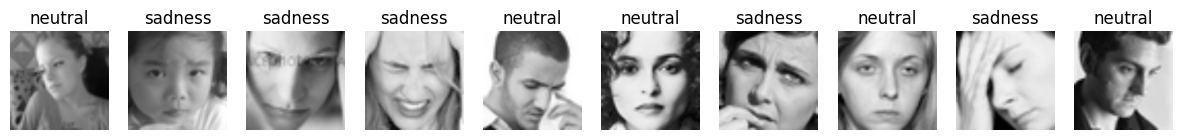

In [42]:
# Assuming 'label_dict' contains the index-to-label mapping
label_dict = {index: value for index, value in enumerate(sub_folders_training)}

# Specify which labels correspond to 'sadness' and 'neutral'
sadness_label = 'sadness'
neutral_label = 'neutral'

# Find indices of images that correspond to 'sadness' and 'neutral'
sadness_indices = [i for i, label in enumerate(Y_train) 
                   if label_dict[np.argmax(label)] == sadness_label]
neutral_indices = [i for i, label in enumerate(Y_train) 
                   if label_dict[np.argmax(label)] == neutral_label]

# Define the total number of images and ensure it's an even number
num_images = 10
num_per_emotion = num_images // 2  # Equal number of sadness and neutral

# Randomly select equal numbers of sadness and neutral images
random_sadness_indices = np.random.choice(sadness_indices, num_per_emotion, replace=False)
random_neutral_indices = np.random.choice(neutral_indices, num_per_emotion, replace=False)

# Combine the selected indices
random_indices = np.concatenate((random_sadness_indices, random_neutral_indices))

# Shuffle the combined indices to mix the images of both emotions
np.random.shuffle(random_indices)

# Plot the images
plt.figure(figsize=(15, 23))

for i, idx in enumerate(random_indices):
    img = np.squeeze(X_train[idx])
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    index = np.argmax(Y_train[idx])
    plt.title(label_dict[index])
    plt.axis('off')

# Save the figure and display
plt.savefig('/home/dualrtx/Desktop/PaperFigures/fer_plus_sadness_neutral_images_equal.png')
plt.show()


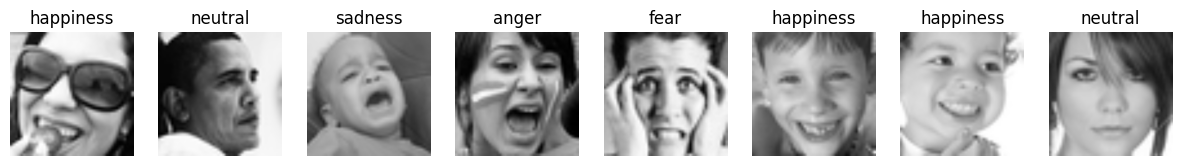

In [28]:
label_dict = {index: value for index, value in enumerate(sub_folders_training)}

# Define the number of images you want to display
num_images = 8

# Get random indices
random_indices = np.random.choice(len(X_train), num_images, replace=False)

plt.figure(figsize=(15, 23))

# Plot random images
for i, idx in enumerate(random_indices):
    img = np.squeeze(X_train[idx])
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    index = np.argmax(Y_train[idx])
    plt.title(label_dict[index])
    plt.axis('off')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/fer_plus_random_images.png')
plt.show()

In [113]:
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
testgen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)

In [114]:
datagen.fit(X_train_scaled)
testgen.fit(X_test_scaled)

In [115]:
train_generator = datagen.flow(X_train_scaled, Y_train, batch_size=64, shuffle=True)
test_generator = testgen.flow(X_test_scaled, Y_test, batch_size=64, shuffle=True)

In [116]:
#initilize parameters
num_classes = len(sub_folders_training) 
width, height = 224, 224
num_epochs = 50
batch_size = 64
num_features = 64

In [117]:
base_model = tf.keras.applications.VGG16(input_shape=(width,height,3), include_top=False, weights="imagenet")

In [118]:
# for layer in base_model.layers[:-4]:
#     layer.trainable = False

model = base_model.output

#flatten
model = Flatten()(model)
# model.add(BatchNormalization())

# #dense 2
# model = Dense(256, activation='relu')(model)
# model = BatchNormalization()(model)
# model = Dropout(0.5)(model)

# #dense 3
# model = Dense(128, activation='relu')(model)
# model = BatchNormalization()(model)
# model = Dropout(0.5)(model)

# #dense 3
# model = Dense(64, activation='relu')(model)
# model = BatchNormalization()(model)

#output layer
output_layer = Dense(num_of_classes, activation='softmax')(model)

model = Model(inputs=base_model.input, outputs=output_layer)

In [119]:
# Model compile
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

In [120]:
# Configure Callbacks
fle_s = './output/emotion_model_VGG16_FERPlus.keras'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the Model
history = model.fit(train_generator,
                    epochs=50,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer, early_stopping, reduce_lr],
                    validation_data=test_generator,
                    steps_per_epoch=len(X_train_scaled) // 64,
                    validation_steps=len(X_test_scaled) // 64)

Epoch 1/50
438/438 [==============================] - ETA: 0s - loss: 1.8213 - accuracy: 0.2967
Epoch 1: val_loss improved from inf to 1.64749, saving model to ./output/emotion_model_VGG16_FERPlus.keras
438/438 [==============================] - 226s 507ms/step - loss: 1.8213 - accuracy: 0.2967 - val_loss: 1.6475 - val_accuracy: 0.4119 - lr: 1.0000e-04
Epoch 2/50
438/438 [==============================] - ETA: 0s - loss: 1.3223 - accuracy: 0.5036
Epoch 2: val_loss improved from 1.64749 to 1.18239, saving model to ./output/emotion_model_VGG16_FERPlus.keras
438/438 [==============================] - 215s 490ms/step - loss: 1.3223 - accuracy: 0.5036 - val_loss: 1.1824 - val_accuracy: 0.5613 - lr: 1.0000e-04
Epoch 3/50
438/438 [==============================] - ETA: 0s - loss: 1.0423 - accuracy: 0.6242
Epoch 3: val_loss did not improve from 1.18239
438/438 [==============================] - 216s 492ms/step - loss: 1.0423 - accuracy: 0.6242 - val_loss: 1.3493 - val_accuracy: 0.5295 - lr: 1.

In [121]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

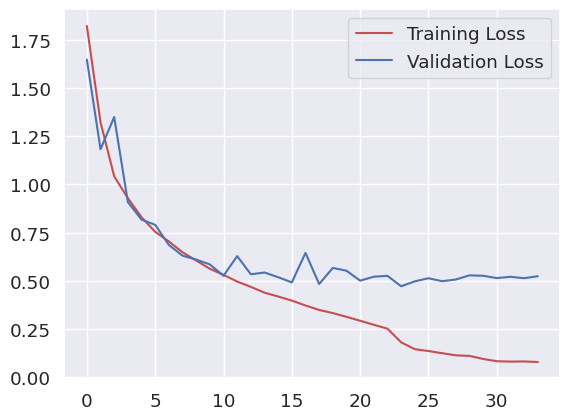

In [122]:
plt.plot(history.history["loss"], 'r', label='Training Loss')
plt.plot(history.history["val_loss"], 'b', label='Validation Loss')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/train_loss_VGG16.png')
plt.legend()

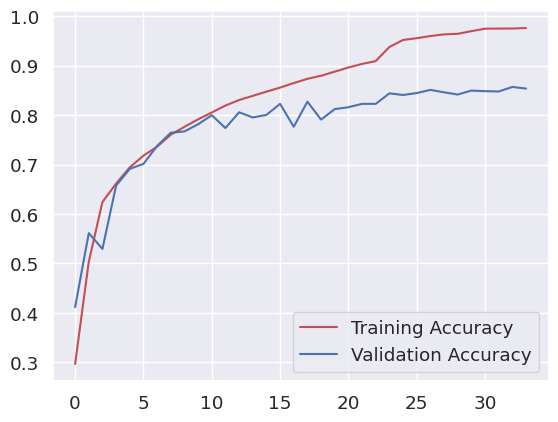

In [123]:
plt.plot(history.history["accuracy"], 'r', label='Training Accuracy')
plt.plot(history.history["val_accuracy"], 'b', label='Validation Accuracy')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/train_accuracy_VGG16.png')
plt.legend()

107/107 [==============================] - 7s 65ms/step


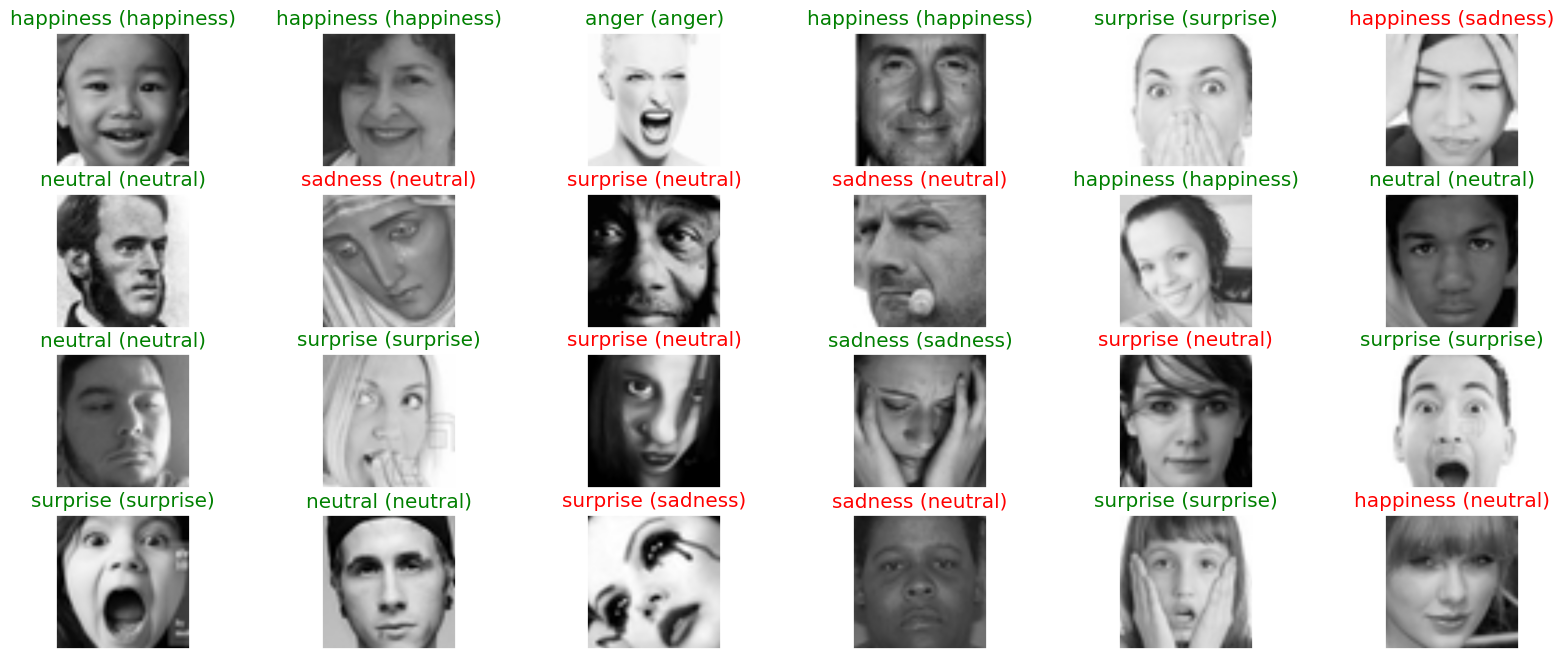

In [124]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )
label_dict = {index: value for index, value in enumerate(sub_folders_training)}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(Y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))
    
plt.savefig('/home/dualrtx/Desktop/PaperFigures/random_img_from_validation_VGG16.png')

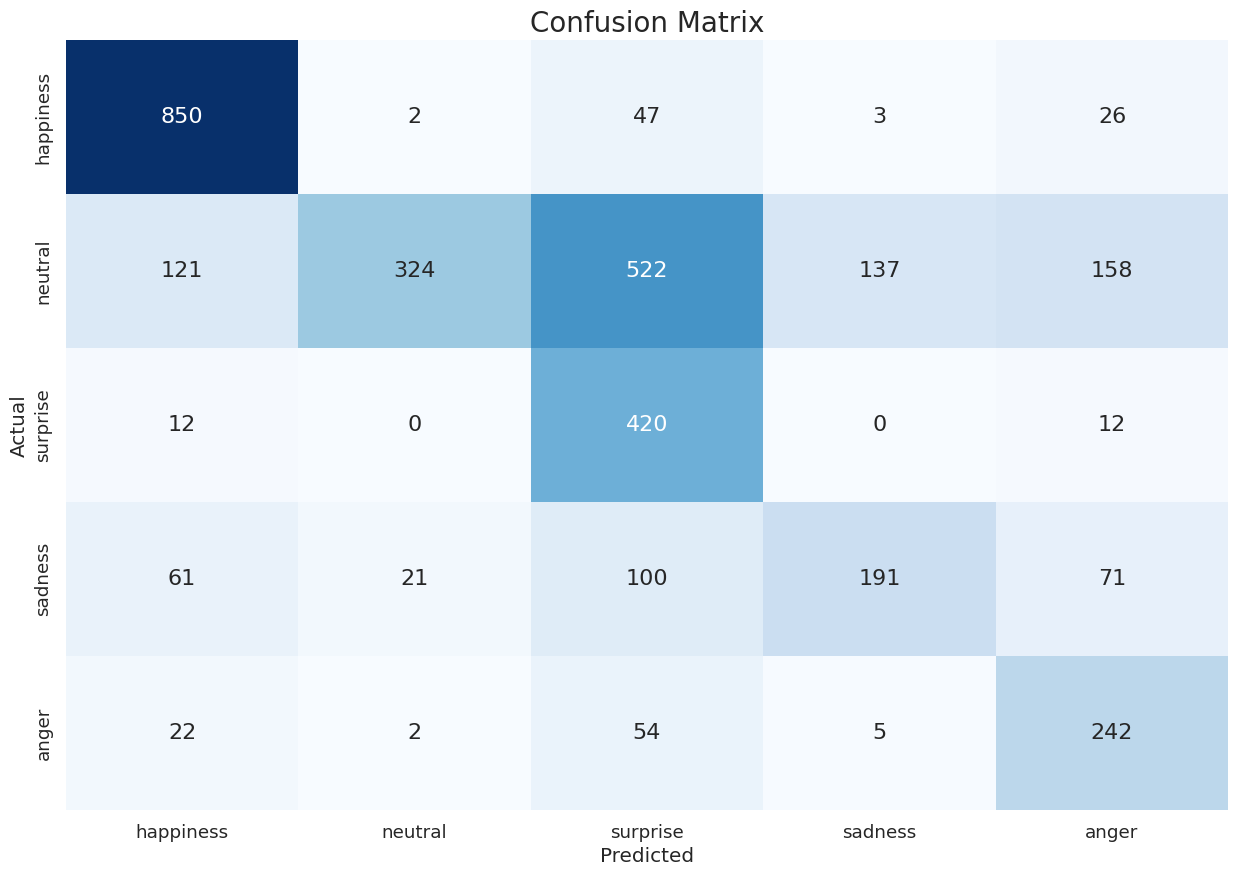

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CLASS_LABELS  = sub_folders_training

cm_data = confusion_matrix(np.argmax(Y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

plt.savefig('/home/dualrtx/Desktop/PaperFigures/conf_matrix_VGG16.png')

In [126]:
datagen.fit(X_train)
testgen.fit(X_test)

In [127]:
train_generator = datagen.flow(X_train, Y_train, batch_size=64, shuffle=True)
test_generator = testgen.flow(X_test, Y_test, batch_size=64, shuffle=True)

In [128]:
base_model = tf.keras.applications.ResNet50(input_shape=(width,height,3), include_top=False, weights="imagenet")

In [129]:
# for layer in base_model.layers[:-4]:
#     layer.trainable = False

model = base_model.output

#flatten
model = Flatten()(model)
# model.add(BatchNormalization())

# #dense 2
# model = Dense(256, activation='relu')(model)
# model = BatchNormalization()(model)
# model = Dropout(0.5)(model)

# #dense 3
# model = Dense(128, activation='relu')(model)
# model = BatchNormalization()(model)
# model = Dropout(0.5)(model)

# #dense 3
# model = Dense(64, activation='relu')(model)
# model = BatchNormalization()(model)

#output layer
output_layer = Dense(num_of_classes, activation='softmax')(model)

model = Model(inputs=base_model.input, outputs=output_layer)

In [130]:
# Model compile
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

In [131]:
# Configure Model Checkpoint
fle_s='./output/emotion_model_ResNet50_FERPlus.keras'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the Model
history = model.fit(train_generator,
                    epochs=50,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer, early_stopping, reduce_lr],
                    validation_data=test_generator,
                    steps_per_epoch=len(X_train_scaled) // 64,
                    validation_steps=len(X_test_scaled) // 64)

Epoch 1/50
438/438 [==============================] - ETA: 0s - loss: 1.2005 - accuracy: 0.5503
Epoch 1: val_loss improved from inf to 0.90992, saving model to ./output/emotion_model_ResNet50_FERPlus.keras
438/438 [==============================] - 238s 496ms/step - loss: 1.2005 - accuracy: 0.5503 - val_loss: 0.9099 - val_accuracy: 0.6666 - lr: 1.0000e-04
Epoch 2/50
438/438 [==============================] - ETA: 0s - loss: 0.7350 - accuracy: 0.7371
Epoch 2: val_loss improved from 0.90992 to 0.61803, saving model to ./output/emotion_model_ResNet50_FERPlus.keras
438/438 [==============================] - 216s 493ms/step - loss: 0.7350 - accuracy: 0.7371 - val_loss: 0.6180 - val_accuracy: 0.7703 - lr: 1.0000e-04
Epoch 3/50
438/438 [==============================] - ETA: 0s - loss: 0.6057 - accuracy: 0.7851
Epoch 3: val_loss improved from 0.61803 to 0.56781, saving model to ./output/emotion_model_ResNet50_FERPlus.keras
438/438 [==============================] - 218s 497ms/step - loss: 0.6

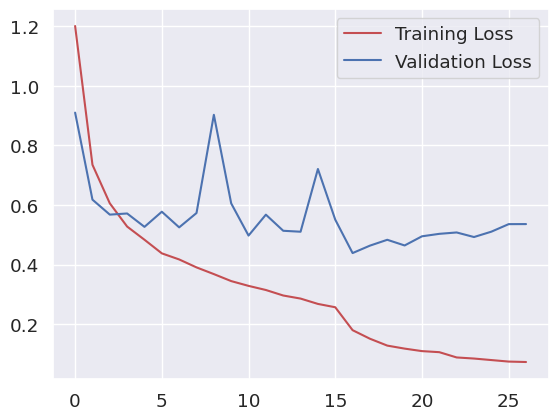

In [132]:
plt.plot(history.history["loss"], 'r', label='Training Loss')
plt.plot(history.history["val_loss"], 'b', label='Validation Loss')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/train_loss_ResNet50.png')
plt.legend()

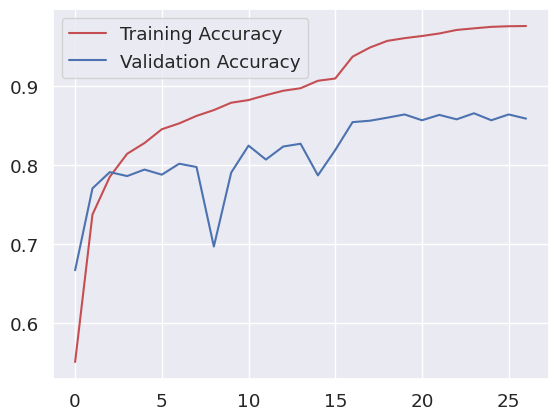

In [133]:
plt.plot(history.history["accuracy"], 'r', label='Training Accuracy')
plt.plot(history.history["val_accuracy"], 'b', label='Validation Accuracy')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/train_acc_ResNet50.png')
plt.legend()

107/107 [==============================] - 5s 44ms/step


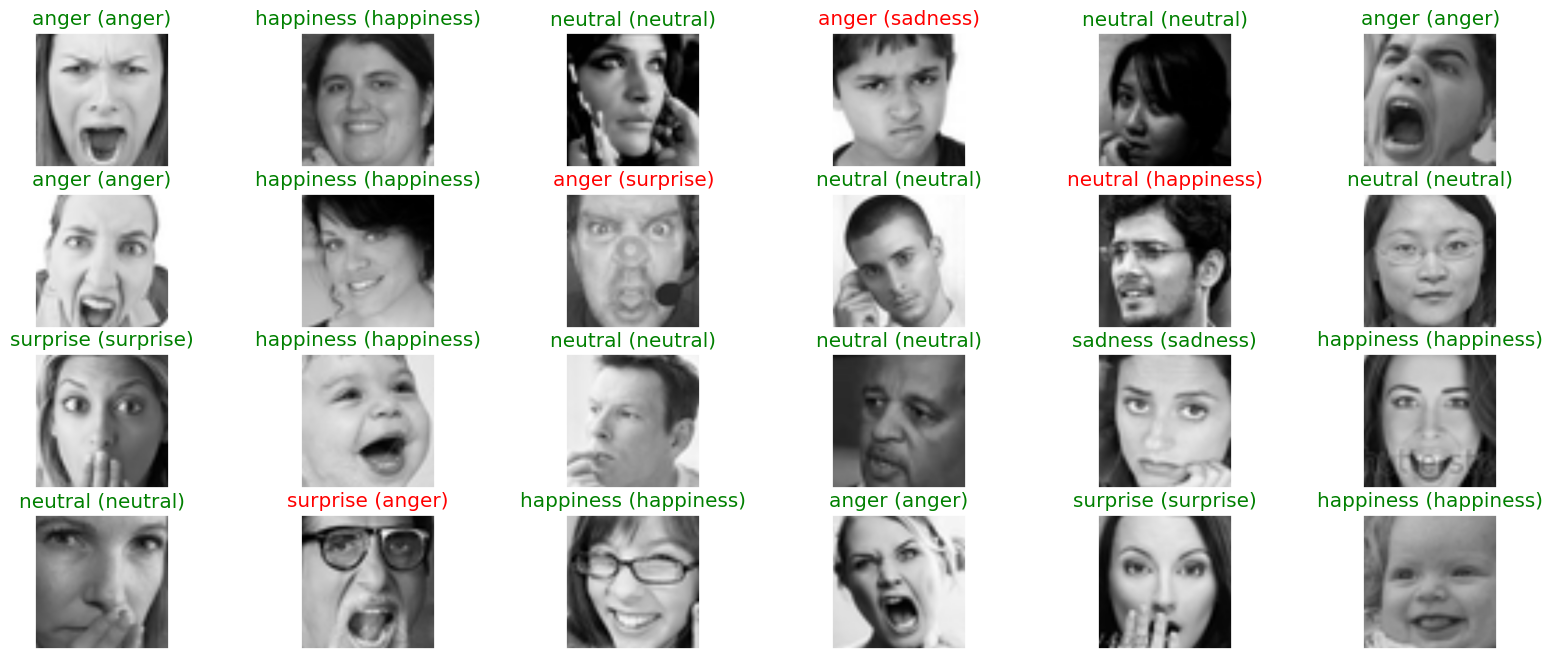

In [134]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )
label_dict = {index: value for index, value in enumerate(sub_folders_training)}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(Y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))
    
plt.savefig('/home/dualrtx/Desktop/PaperFigures/random_img_from_validation_ResNet50.png')

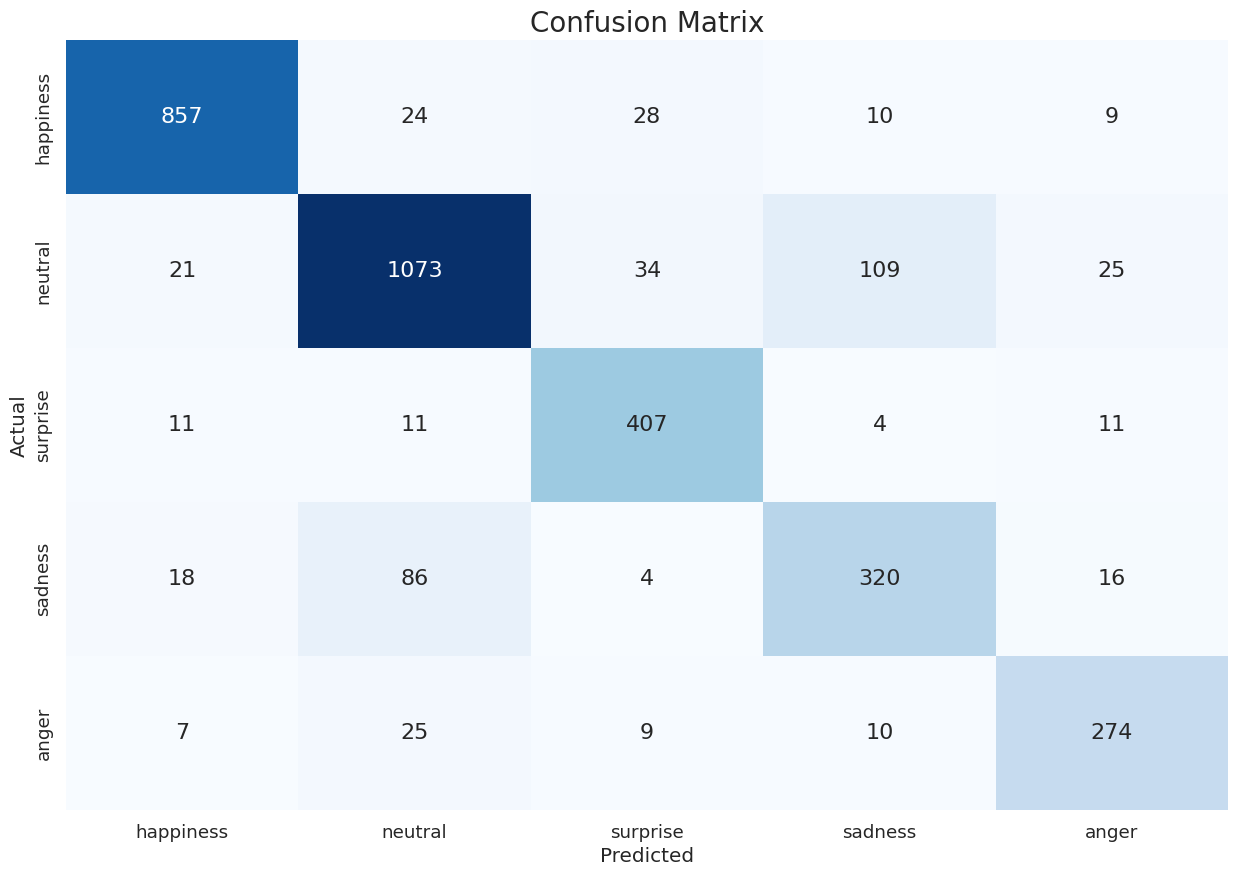

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CLASS_LABELS  = sub_folders_training

cm_data = confusion_matrix(np.argmax(Y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/conf_matrix_ResNet50.png')

In [136]:
datagen.fit(X_train)
testgen.fit(X_test)

In [137]:
train_generator = datagen.flow(X_train, Y_train, batch_size=64, shuffle=True)
test_generator = testgen.flow(X_test, Y_test, batch_size=64, shuffle=True)

In [138]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width,height,3), include_top=False, weights="imagenet")

In [139]:
# for layer in base_model.layers[:-4]:
#     layer.trainable = False

model = base_model.output

#flatten
model = Flatten()(model)
# model.add(BatchNormalization())

# #dense 2
# model = Dense(256, activation='relu')(model)
# model = BatchNormalization()(model)
# model = Dropout(0.5)(model)

# #dense 3
# model = Dense(128, activation='relu')(model)
# model = BatchNormalization()(model)
# model = Dropout(0.5)(model)

# #dense 3
# model = Dense(64, activation='relu')(model)
# model = BatchNormalization()(model)

#output layer
output_layer = Dense(num_of_classes, activation='softmax')(model)

model = Model(inputs=base_model.input, outputs=output_layer)

In [140]:
# Model compile
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

In [141]:
# Configure Model Checkpoint
fle_s='./output/emotion_model_MobileNetV2_FERPlus.keras'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the Model
history = model.fit(train_generator,
                    epochs=50,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer, early_stopping, reduce_lr],
                    validation_data=test_generator,
                    steps_per_epoch=len(X_train_scaled) // 64,
                    validation_steps=len(X_test_scaled) // 64)

Epoch 1/50
438/438 [==============================] - ETA: 0s - loss: 1.2780 - accuracy: 0.5194
Epoch 1: val_loss improved from inf to 1.41961, saving model to ./output/emotion_model_MobileNetV2_FERPlus.keras
438/438 [==============================] - 231s 492ms/step - loss: 1.2780 - accuracy: 0.5194 - val_loss: 1.4196 - val_accuracy: 0.4596 - lr: 1.0000e-04
Epoch 2/50
438/438 [==============================] - ETA: 0s - loss: 0.8650 - accuracy: 0.6852
Epoch 2: val_loss improved from 1.41961 to 1.00304, saving model to ./output/emotion_model_MobileNetV2_FERPlus.keras
438/438 [==============================] - 215s 491ms/step - loss: 0.8650 - accuracy: 0.6852 - val_loss: 1.0030 - val_accuracy: 0.6406 - lr: 1.0000e-04
Epoch 3/50
438/438 [==============================] - ETA: 0s - loss: 0.7133 - accuracy: 0.7390
Epoch 3: val_loss improved from 1.00304 to 0.87575, saving model to ./output/emotion_model_MobileNetV2_FERPlus.keras
438/438 [==============================] - 216s 493ms/step - 

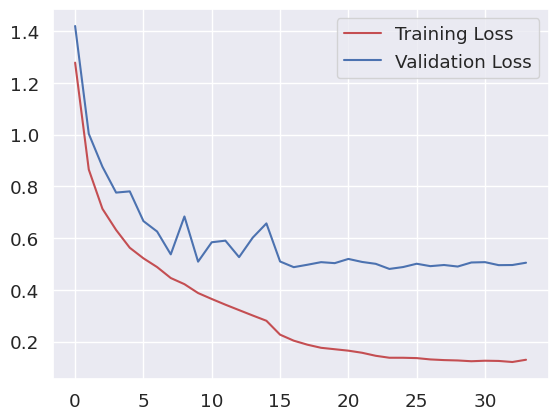

In [142]:
plt.plot(history.history["loss"], 'r', label='Training Loss')
plt.plot(history.history["val_loss"], 'b', label='Validation Loss')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/train_loss_MobileNetv2.png')
plt.legend()

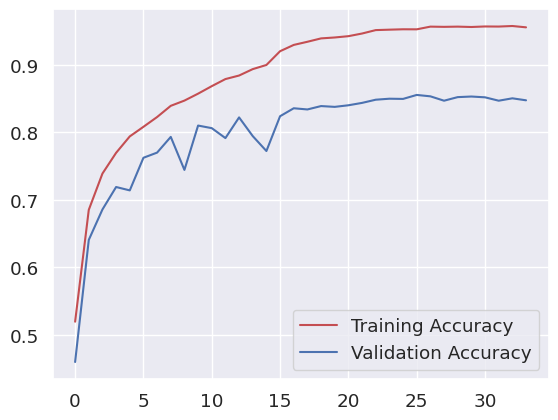

In [143]:
plt.plot(history.history["accuracy"], 'r', label='Training Accuracy')
plt.plot(history.history["val_accuracy"], 'b', label='Validation Accuracy')
plt.savefig('/home/dualrtx/Desktop/PaperFigures/train_acc_MobileNetv2.png')
plt.legend()

107/107 [==============================] - 3s 22ms/step


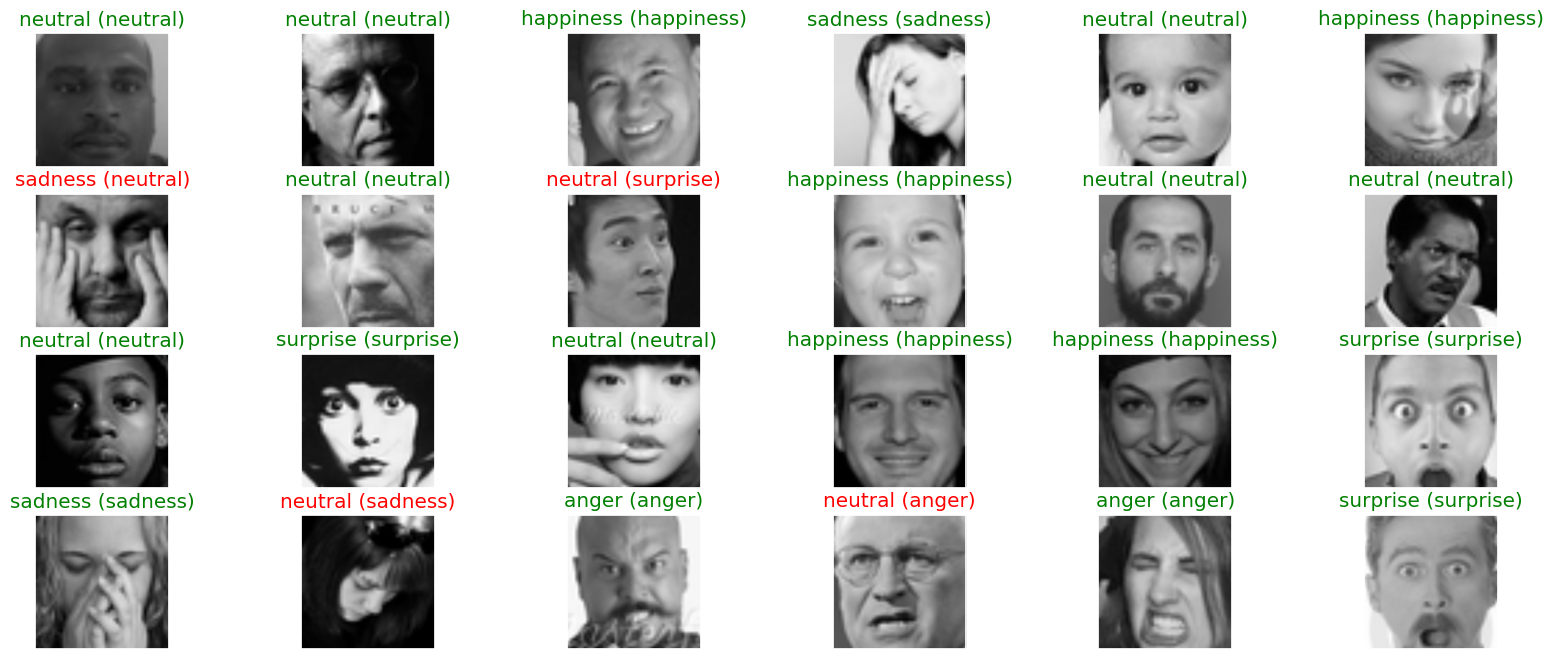

In [144]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )
label_dict = {index: value for index, value in enumerate(sub_folders_training)}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(Y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))
    
plt.savefig('/home/dualrtx/Desktop/PaperFigures/random_img_from_validation_MobileNetv2.png')

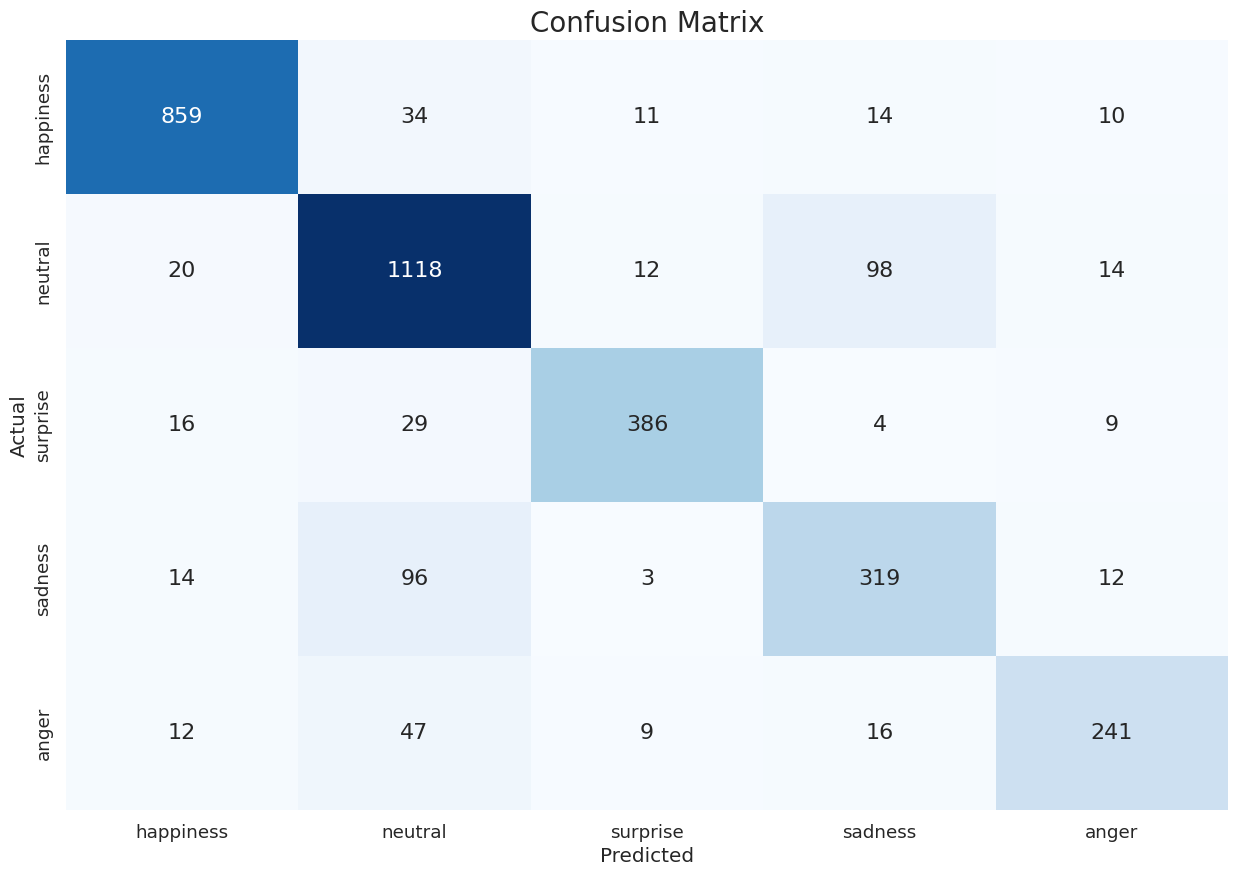

In [145]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CLASS_LABELS  = sub_folders_training

cm_data = confusion_matrix(np.argmax(Y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

plt.savefig('/home/dualrtx/Desktop/PaperFigures/conf_matrix_MobileNetv2.png')

In [68]:
# Load the Keras model
model_name = "emotion_model_MobileNetV2_FERPlus"
emotion_model = tf.keras.models.load_model(f"./output/{model_name}.keras")

emotion_model.export("test")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model("test")
tflite_model = converter.convert()

# Save the model.
with open(model_name + ".tflite", 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: test/assets


INFO:tensorflow:Assets written to: test/assets


Saved artifact at 'test'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_3')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  137721087462208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137720110359552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087464144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087471184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087473648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087469072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137722691013088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087467840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087468016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087465200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137721087465728: TensorSpec(sha

2024-06-10 10:26:24.952951: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-06-10 10:26:24.952996: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-06-10 10:26:24.953199: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: test
2024-06-10 10:26:24.958870: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-10 10:26:24.958888: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: test
2024-06-10 10:26:24.978831: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-06-10 10:26:25.354757: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: test
2024-06-10 10:26:25.474838: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }; Status: success: OK. Took 521640 microseconds.
Summary on the non-con

In [ ]:
import cv2
import numpy as np
import time
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from tflite_runtime.interpreter import Interpreter

# Load YOLO model for face detection
net = cv2.dnn.readNet('yolov4-tiny-face.cfg', 'yolov4_tiny_face_final.weights')
# Get output layer names
layer_names = net.getUnconnectedOutLayersNames()
classes = []
with open('face.names', 'r') as f:
    classes = f.read().splitlines()

# Load TFLite model for emotion prediction
interpreter = Interpreter(model_path="emotion_model_VGG16.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load subset labels
subset_labels_file = "subset_labels.lst"
subset_labels = []
with open(subset_labels_file, 'r') as f:
    subset_labels = f.read().splitlines()

# Initialize variables for tracking time
face_detection_times = []
emotion_prediction_times = []

# Initialize variables for confusion matrix
true_labels = []
predicted_labels = []

# Initialize output file for time measurements
time_file = open("time_measurements.txt", "w")

# Initialize output file for confusion matrix
confusion_matrix_file = open("confusion_matrix.txt", "w")

# Initialize annotation file
annotation_file = open("annotations.csv", "w")
annotation_file.write("Image Name,Face Detected,Emotion Label\n")

# Loop through each image in the subset
for image_info in tqdm(subset_labels):
    # Load image
    image_path = os.path.join("subset_images", image_info.split()[0])
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Perform face detection using YOLO
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    start_time = time.time()
    outs = net.forward(layer_names)
    end_time = time.time()
    face_detection_time = end_time - start_time
    face_detection_times.append(face_detection_time)
    time_file.write(f"Face detection time for {image_info}: {face_detection_time} seconds\n")

    # Initialize flag for face detection
    face_detected = False

    # Extract bounding boxes and perform emotion prediction for each detected face
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and class_id == 0:  # Check if the detected object is a person (class_id 0)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                
                # print(f"Face image dimensions: ({w},{h},{x},{y}), Image is: {image_info}")
    
                # Ensure the bounding box dimensions are valid
                if w > 0 and h > 0 and x > 0 and y > 0:
                    # Crop face region and resize to 48x48 for emotion prediction
                    face_img = img[y:y+h, x:x+w]
                    resized_face_img = cv2.resize(face_img, (224, 224))
                    grey_img = cv2.cvtColor(resized_face_img, cv2.COLOR_BGR2GRAY)
                    rgb_img = cv2.cvtColor(grey_img, cv2.COLOR_GRAY2BGR)
                    # resized_face_img = cv2.cvtColor(resized_face_img, cv2.COLOR_BGR2GRAY)
    
                    # Perform emotion prediction using TFLite model
                    input_data = rgb_img.astype(np.float32)[np.newaxis, ...] / 255.0
    
                    interpreter.set_tensor(input_details[0]['index'], input_data)
                    start_time = time.time()
                    interpreter.invoke()
                    output_data = interpreter.get_tensor(output_details[0]['index'])
                    end_time = time.time()
                    emotion_prediction_time = end_time - start_time
                    emotion_prediction_times.append(emotion_prediction_time)
                    time_file.write(f"Emotion prediction time for {image_info}: {emotion_prediction_time} seconds\n")
    
                    # Update true and predicted labels for confusion matrix
                    true_label = int(image_info.split()[-1])
                    true_labels.append(true_label)
                    predicted_label = np.argmax(output_data[0])
                    predicted_labels.append(predicted_label)
                    #print(f"True label: {true_label} \n Predicted label: {predicted_label}")
                    face_detected = True
                else:
                    annotation_file.write(f"{image_info},Invalid bounding box dimensions, skipping...,\n")
            # Write to annotation file outside of inner loop
    if face_detected:
        annotation_file.write(f"{image_info},{True},\n")
    else:
        annotation_file.write(f"{image_info},{False},\n")

# Close output files
time_file.close()
confusion_matrix_file.close()
annotation_file.close()

# Compute confusion matrix and save to file
conf_matrix = confusion_matrix(true_labels, predicted_labels)
np.savetxt("confusion_matrix.txt", conf_matrix, fmt='%d')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
CLASS_LABELS = ['happy', 'fear', 'surprise', 'sadness', 'anger', 'disgust', 'contempt']
cm = pd.DataFrame(conf_matrix, columns=CLASS_LABELS, index=CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(15, 10))
plt.title('Confusion Matrix', fontsize=20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')
plt.show()

print("Face detection and emotion prediction completed.")